# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud, STOPWORDS

# import plotly.express as px
import matplotlib.pyplot as plt

# Preprocessing

## Loading datasets

In [ ]:
# path = '/Users/joshuawong/Desktop/dataset_1'
path = 'C:/Users/user/Documents/GitHub/Fake-News-Detection/dataset_1' #lingjia

os.chdir(path)
os.listdir()

In [ ]:
# Reading CSV files
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

# Defing new column with class label
fake['class_label'] = 'Fake'
true['class_label'] = 'True'

# Combining datasets
df = pd.concat([true, fake], ignore_index=True)
df

In [ ]:
# Combine title and text columns
df['text'] = df['title'] + ' ' + df['text']

# Drop date and title columns
df = df.drop(columns=['date', 'title'])
df

## Preprocessing for Wordclouds

In [ ]:
# Testing preprocessing function for wordclouds, which require a string as input
text = df['text'][0] # Declare sample text for preprocessing from df
print(text+'\n\n') # Uncomment to see original text
remove_punctuations = ''.join([word for word in text if word not in string.punctuation and word not in ['“', '”', '’', '‘']])
lowercase = remove_punctuations.lower()
tokenize = word_tokenize(lowercase)
stopwords_removed = [word for word in tokenize if word not in STOPWORDS]
# stemmed = [PorterStemmer().stem(word) for word in stopwords_removed] # Not sure if we need to stem here for the wordclouds
lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stopwords_removed]
preprocessed_text = " ".join(stopwords_removed) # Join back all tokenized words into a string
preprocessed_text # Once satisfied, make into function

In [ ]:
def preprocess(text):
    remove_punctuations = ''.join([word for word in text if word not in string.punctuation and word not in ['“', '”', '’', '‘']])
    lowercase = remove_punctuations.lower()
    tokenized = word_tokenize(lowercase)
    stopwords_removed = [word for word in tokenized if word not in STOPWORDS]
    lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stopwords_removed]
    preprocessed_text = " ".join(stopwords_removed)
    return preprocessed_text

# Apply function to text column and create new column for use later with wordclouds
df['text_preprocessed'] = df['text'].apply(preprocess)

## Word embedding model

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
fdist = nltk.FreqDist(haze)

In [ ]:


vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

# EDA

## Class distribution

In [ ]:
x = df['class_label'].unique()
y = df['class_label'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+500,y[i], ha='center') # Second element - adjust space above bar to plot the label

fig = plt.figure()
plt.ylim([0, 26000]) # Set y-axis limits
plt.bar(x,y, color={'blue', 'red'})
plt.title('Class distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

# plt.savefig('images/class_distribution.png')


## Subjects distribution

In [ ]:
x = df['subject'].unique()
y = df['subject'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+300,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 12500]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Subjects distribution')
plt.xlabel('Subjects')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

# plt.savefig('images/category_counts.png')

# Wordclouds

In [ ]:
# Defining stopwords
stopwords_list = list(set(stopwords.words('english') + list(STOPWORDS))) # combine NLTK stopwords and wordcloud STOPWORDS
stopwords_list[:10] # Show some examples of stopwords

## All words

In [ ]:
# Create wordcloud string to pass into wordcloud
wordcloud_string1 = ""
for text in df['text_preprocessed']:
    wordcloud_string1 += text

wordcloud_string[:500] # Show output string

In [ ]:
fdist = nltk.FreqDist(wordcloud_string1.split(' '))
most_common = fdist.most_common(22)

In [ ]:
most_common

In [ ]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_all.png')

## Fake only

In [ ]:
# Create wordcloud string to pass into wordcloud
wordcloud_string2 = ""
for text in df['text_preprocessed'][df['class_label']=='Fake']:
    wordcloud_string2 += text

In [ ]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_fake.png')

## True only

In [ ]:
# Create wordcloud string to pass into wordcloud
wordcloud_string3 = ""
for text in df['text_preprocessed'][df['class_label']=='True']:
    wordcloud_string3 += text

In [ ]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_true.png')

# Sentiment Analysis

## Using VADER

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
df.head()

In [ ]:
df['scores'] = df['text_preprocessed'].apply(lambda text_preprocessed: sid.polarity_scores(text_preprocessed))


In [ ]:
df['vader_compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

df

## Using TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getSentiment(polarity):
    if polarity > 0:
        return 'pos'
    elif polarity == 0:
        return 'neu'
    else:
        return 'neg'

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['textblob_polarity'] = df['text_preprocessed'].apply(getPolarity)
df['textblob_sentiment']= df['textblob_polarity'].apply(getSentiment)
df['textblob_subjectivity'] = df['text_preprocessed'].apply(getSubjectivity)

In [44]:
df

,text,subject,class_label,text_preprocessed,scores,vader_compound,textblob_polarity,textblob_sentiment,textblob_subjectivity
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,True,us budget fight looms republicans flip fiscal ...,"{'neg': 0.072, 'neu': 0.801, 'pos': 0.127, 'co...",0.9790,0.036979,pos,0.403438
1,U.S. military to accept transgender recruits o...,politicsNews,True,us military accept transgender recruits monday...,"{'neg': 0.089, 'neu': 0.753, 'pos': 0.158, 'co...",0.9661,0.106638,pos,0.290224
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,True,senior us republican senator let mr mueller jo...,"{'neg': 0.071, 'neu': 0.839, 'pos': 0.09, 'com...",0.5719,0.129766,pos,0.311252
3,FBI Russia probe helped by Australian diplomat...,politicsNews,True,fbi russia probe helped australian diplomat ti...,"{'neg': 0.096, 'neu': 0.81, 'pos': 0.093, 'com...",-0.1761,0.029358,pos,0.267688
4,Trump wants Postal Service to charge 'much mor...,politicsNews,True,trump wants postal service charge much amazon ...,"{'neg': 0.083, 'neu': 0.79, 'pos': 0.127, 'com...",0.9633,0.036082,pos,0.356738
...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,Middle-east,Fake,mcpain john mccain furious iran treated us sai...,"{'neg': 0.158, 'neu': 0.678, 'pos': 0.163, 'co...",0.2495,0.022300,pos,0.456461
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Middle-east,Fake,justice yahoo settles email privacy classactio...,"{'neg': 0.09, 'neu': 0.754, 'pos': 0.155, 'com...",0.9260,0.086667,pos,0.486667
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Middle-east,Fake,sunnistan us allied safe zone plan take territ...,"{'neg': 0.156, 'neu': 0.71, 'pos': 0.135, 'com...",-0.9979,0.062158,pos,0.394354
44896,How to Blow $700 Million: Al Jazeera America F...,Middle-east,Fake,blow 700 million al jazeera america finally ca...,"{'neg': 0.085, 'neu': 0.802, 'pos': 0.114, 'co...",0.8555,0.100000,pos,0.418640


## Plotting counts of Sentiment
### For True Articles

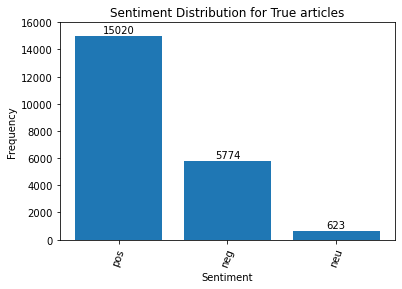

In [51]:
x = df[df['class_label']=='True']['textblob_sentiment'].unique()
y = df[df['class_label']=='True']['textblob_sentiment'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+200,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 16000]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Sentiment Distribution for True articles')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

### For Fake Articles

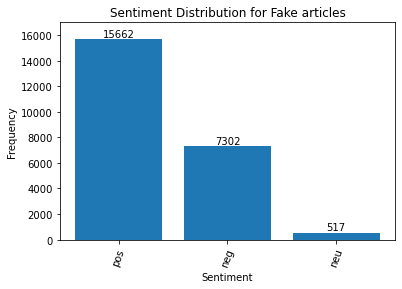

In [52]:
x = df[df['class_label']=='Fake']['textblob_sentiment'].unique()
y = df[df['class_label']=='Fake']['textblob_sentiment'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+200,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 17000]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Sentiment Distribution for Fake articles')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

## Subjectivity Distribution
### For True articles

In [ ]:
x = df[df['class_label']=='True']['textblob_subjectivity'].unique()
y = df[df['class_label']=='True']['textblob_subjectivity'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+200,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 16000]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Subjectivity Distribution for True articles')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

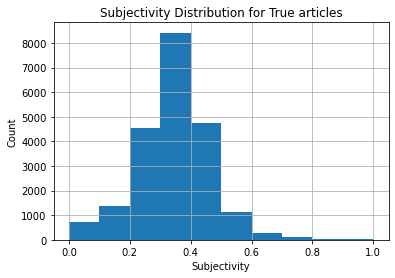

In [67]:
true_subjectivity_hist = df[df['class_label']=='True'].hist(column='textblob_subjectivity')
plt.title('Subjectivity Distribution for True articles')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.savefig('../images/sentiment analysis/subjectivity_distribution_true_articles.png')

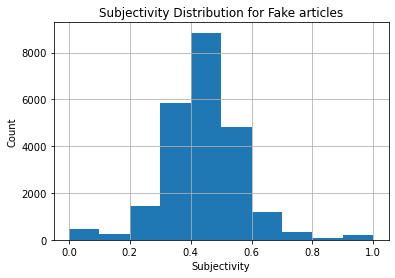

In [68]:
fake_subjectivity_hist = df[df['class_label']=='Fake'].hist(column='textblob_subjectivity')
plt.title('Subjectivity Distribution for Fake articles')
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.savefig('../images/sentiment analysis/subjectivity_distribution_fake_articles.png')

Text(0, 0.5, 'Count')

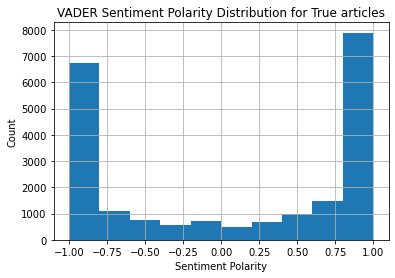

In [46]:
true_vader_polarity_hist = df[df['class_label']=='True'].hist(column='vader_compound')
plt.title('VADER Sentiment Polarity Distribution for True articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

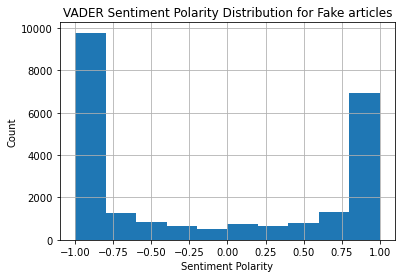

In [47]:
fake_vader_polarity_hist = df[df['class_label']=='Fake'].hist(column='vader_compound')
plt.title('VADER Sentiment Polarity Distribution for Fake articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

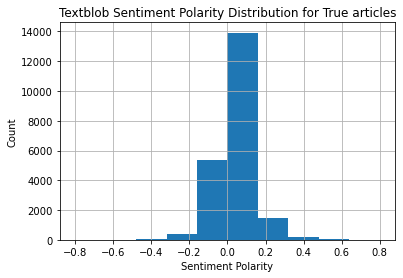

In [48]:
true_texblob_polarity_hist = df[df['class_label']=='True'].hist(column='textblob_polarity')
plt.title('Textblob Sentiment Polarity Distribution for True articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

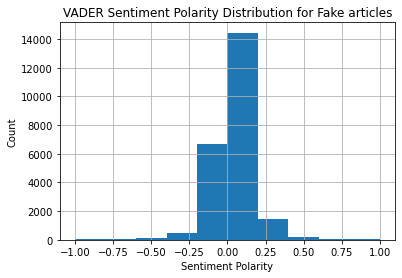

In [50]:
fake_textblob_polarity_hist = df[df['class_label']=='Fake'].hist(column='textblob_polarity')
plt.title('VADER Sentiment Polarity Distribution for Fake articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')